<a href="https://colab.research.google.com/github/Abdullahbrsn69/Machine-Learning-Projects/blob/main/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Risk Analizinin amacı, bir kredi başvurusunda bulunan bireylerin veya kuruluşların kredi geri ödeme yeteneklerini tahmin etmektir**

İşte Credit Risk Kaggle veri setindeki sütun adlarının kısaltmalarının anlamları:

1. person_age → age : Kişinin yaşı.
2. person_income → income : Kişinin gelir seviyesi.
3. person_home_ownership → home_own : Kişinin ev sahipliği durumu (sahip mi, kiracı mı).
4. person_emp_length → emp_len : Kişinin çalışma süresi (yılda).
5. loan_intent → loan_purpose : Kredinin amacı (örneğin, ev, eğitim, vb.).
6. loan_grade → grade : Kredinin notu (A, B, C, D gibi).
7. loan_amnt → loan_amt : Verilen kredi miktarı.
8. loan_int_rate → int_rate : Kredi faiz oranı.
9. loan_status → status : Kredi durumu (onaylanmış, reddedilmiş, vb.).
10. loan_percent_income → loan_pct_income : Kredi miktarının gelir yüzdesi.
11. cb_person_default_on_file → has_default : Kişinin daha önce ödeme default'u yapıp yapmadığı (evet veya hayır).
12. cb_person_cred_hist_length → cred_hist_len : Kişinin kredi geçmişi uzunluğu (yılda).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, r2_score
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# shorting to dataset columns name
df = df.rename(columns={
    "person_age": "age",
    "person_income": "income",
    "person_home_ownership": "home_own",
    "person_emp_length": "emp_len",
    "loan_intent": "loan_purpose",
    "loan_grade": "grade",
    "loan_amnt": "loan_amt",
    "loan_int_rate": "int_rate",
    "loan_status": "status",
    "loan_percent_income": "loan_pct_income",
    "cb_person_default_on_file": "has_default",
    "cb_person_cred_hist_length": "cred_hist_len"
})

In [4]:
df.head()

,age,income,home_own,emp_len,loan_purpose,grade,loan_amt,int_rate,status,loan_pct_income,has_default,cred_hist_len
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              32581 non-null  int64  
 1   income           32581 non-null  int64  
 2   home_own         32581 non-null  object 
 3   emp_len          31686 non-null  float64
 4   loan_purpose     32581 non-null  object 
 5   grade            32581 non-null  object 
 6   loan_amt         32581 non-null  int64  
 7   int_rate         29465 non-null  float64
 8   status           32581 non-null  int64  
 9   loan_pct_income  32581 non-null  float64
 10  has_default      32581 non-null  object 
 11  cred_hist_len    32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,age,income,emp_len,loan_amt,int_rate,status,loan_pct_income,cred_hist_len
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.isnull().sum()

,0
age,0
income,0
home_own,0
emp_len,895
loan_purpose,0
grade,0
loan_amt,0
int_rate,3116
status,0
loan_pct_income,0


In [5]:
# emp_len sütununda uçuk değerler gözüküyor
print(df["emp_len"].describe())
print(df["emp_len"].sort_values(ascending=False).head(5))  # En büyük 5 değeri gör

count    31686.000000
mean         4.789686
std          4.142630
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: emp_len, dtype: float64
0        123.0
210      123.0
32355     41.0
32515     38.0
32428     34.0
Name: emp_len, dtype: float64


In [ ]:
# in_rate bloğundaki kayıp verileri ortalama ve standart sapma stabilizasyonuyla dolduralım
mean_int_rate = df['int_rate'].mean()
std_int_rate = df['int_rate'].std()
df['int_rate'] = df['int_rate'].fillna(np.random.uniform(mean_int_rate - std_int_rate, mean_int_rate + std_int_rate))



# emp_len (yıl olarak çalışma süresi)'nde çok uçuk değerleri silelim ve ortalama ile dolduralım

df = df[(df['emp_len'] >= 0) & (df['emp_len'] <= 80)]
df['emp_len'].fillna(df['emp_len'].mean(), inplace=True)

In [7]:
df.head()

,age,income,home_own,emp_len,loan_purpose,grade,loan_amt,int_rate,status,loan_pct_income,has_default,cred_hist_len
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [8]:
# Label Encoding

encoder = LabelEncoder()

cat_col = ['has_default', 'grade']

for col in cat_col:
  df[col] = encoder.fit_transform(df[col])

In [9]:
# One-Hot-Encoding

df = pd.get_dummies(df, columns=['home_own', 'loan_purpose'])
df.head()

,age,income,emp_len,grade,loan_amt,int_rate,status,loan_pct_income,has_default,cred_hist_len,home_own_MORTGAGE,home_own_OTHER,home_own_OWN,home_own_RENT,loan_purpose_DEBTCONSOLIDATION,loan_purpose_EDUCATION,loan_purpose_HOMEIMPROVEMENT,loan_purpose_MEDICAL,loan_purpose_PERSONAL,loan_purpose_VENTURE
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,False,False,True,False,False,True,False,False,False,False
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,True,False,False,False,False,False,False,True,False,False
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,False,False,False,True,False,False,False,True,False,False
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,False,False,False,True,False,False,False,True,False,False
5,21,9900,2.0,0,2500,7.14,1,0.25,0,2,False,False,True,False,False,False,False,False,False,True


In [10]:
cat_col_bool = ['home_own_MORTGAGE', 'home_own_OTHER', 'home_own_OWN', 'home_own_RENT', 'loan_purpose_DEBTCONSOLIDATION', 'loan_purpose_EDUCATION', 'loan_purpose_HOMEIMPROVEMENT', 'loan_purpose_MEDICAL', 'loan_purpose_PERSONAL', 'loan_purpose_VENTURE']
for col in cat_col_bool:
  df[col] = encoder.fit_transform(df[col])

In [11]:
df.corr()

,age,income,emp_len,grade,loan_amt,int_rate,status,loan_pct_income,has_default,cred_hist_len,home_own_MORTGAGE,home_own_OTHER,home_own_OWN,home_own_RENT,loan_purpose_DEBTCONSOLIDATION,loan_purpose_EDUCATION,loan_purpose_HOMEIMPROVEMENT,loan_purpose_MEDICAL,loan_purpose_PERSONAL,loan_purpose_VENTURE
age,1.000000,0.174836,0.169288,0.013042,0.051366,0.012267,-0.023019,-0.041104,0.005219,0.858829,0.033399,-0.008640,0.000207,-0.032003,-0.009741,-0.088913,0.074051,0.018384,0.034505,-0.011321
income,0.174836,1.000000,0.136124,-0.002926,0.263645,-0.000718,-0.140388,-0.252990,-0.004418,0.119042,0.202281,0.009045,-0.034575,-0.181947,0.002215,-0.016252,0.043107,-0.035183,0.013888,0.001644
emp_len,0.169288,0.136124,1.000000,-0.048976,0.110931,-0.053697,-0.085979,-0.058624,-0.030032,0.149621,0.227264,-0.015870,0.027407,-0.236530,-0.001904,-0.039264,0.030789,-0.001784,0.009384,0.010178
grade,0.013042,-0.002926,-0.048976,1.000000,0.144555,0.866681,0.376957,0.125132,0.536561,0.013928,-0.113274,0.018048,-0.012457,0.116078,0.001569,-0.007559,0.029140,-0.000106,-0.007104,-0.010518
loan_amt,0.051366,0.263645,0.110931,0.144555,1.000000,0.135605,0.112152,0.577051,0.038745,0.042521,0.130418,0.012997,-0.022597,-0.117978,0.000646,-0.010839,0.043964,-0.023320,-0.001242,-0.000446
int_rate,0.012267,-0.000718,-0.053697,0.866681,0.135605,1.000000,0.313280,0.115226,0.463405,0.016783,-0.122043,0.017200,-0.007534,0.122202,-0.001414,-0.009342,0.017070,0.007623,-0.004139,-0.006646
status,-0.023019,-0.140388,-0.085979,0.376957,0.112152,0.313280,1.000000,0.379815,0.181121,-0.016856,-0.185556,0.013169,-0.101978,0.235305,0.072525,-0.055607,0.034469,0.058139,-0.022576,-0.077247
loan_pct_income,-0.041104,-0.252990,-0.058624,0.125132,0.577051,0.115226,0.379815,1.000000,0.036261,-0.030865,-0.145391,0.012249,0.045889,0.117445,0.003315,-0.001475,-0.015991,0.014149,-0.004599,0.001606
has_default,0.005219,-0.004418,-0.030032,0.536561,0.038745,0.463405,0.181121,0.036261,1.000000,0.003972,-0.059622,0.014225,-0.001273,0.057747,0.004842,-0.006063,0.015661,-0.003921,-0.003855,-0.003416
cred_hist_len,0.858829,0.119042,0.149621,0.013928,0.042521,0.016783,-0.016856,-0.030865,0.003972,1.000000,0.025215,-0.006914,0.004872,-0.026616,-0.010162,-0.077578,0.058906,0.014570,0.036357,-0.008228


In [12]:
# HARİKA BİR ÖZELLİK DE EKLEYELİM: EN YÜKSEK KORELASYONLARI BULAN KOD -> BÜYÜK VERİ SETLERİNDE BİZİM ARAMAMIZA GEREK KALMAZ

# Korelasyon matrisini hesapla
correlation_matrix = df.corr()

# Üst üçgen matrisini seç
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# En yüksek korelasyon değerlerini bul
highest_correlations = upper_triangle.stack().sort_values(ascending=False)

print(highest_correlations)

grade                   int_rate                0.866681
age                     cred_hist_len           0.858829
loan_amt                loan_pct_income         0.577051
grade                   has_default             0.536561
int_rate                has_default             0.463405
                                                  ...   
loan_purpose_EDUCATION  loan_purpose_MEDICAL   -0.237999
home_own_MORTGAGE       home_own_OWN           -0.240773
income                  loan_pct_income        -0.252990
home_own_OWN            home_own_RENT          -0.291176
home_own_MORTGAGE       home_own_RENT          -0.851585
Length: 190, dtype: float64


<ipython-input-45-9f25caf1846a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='grade', y='int_rate', data=df, palette="Set2")


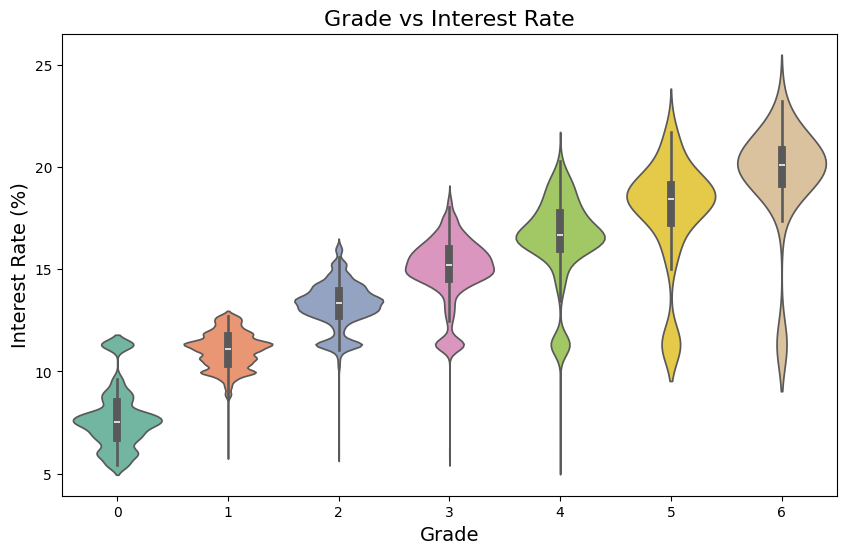

In [ ]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='grade', y='int_rate', data=df, palette="Set2")
plt.title('Grade vs Interest Rate', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Interest Rate (%)', fontsize=14)
plt.xticks(rotation=0)
plt.show()

<ipython-input-44-59a7169bccfb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grade', y='int_rate', data=df, palette="Set2")


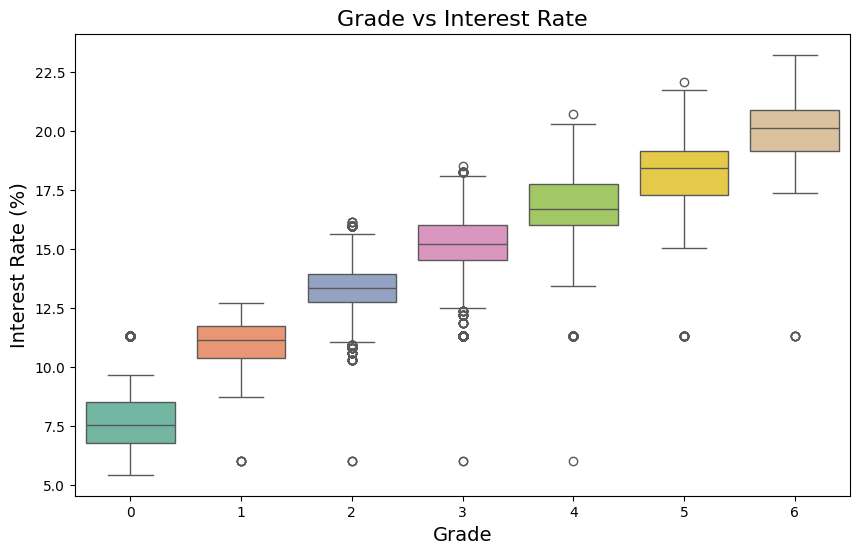

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=df, palette="Set2")
plt.title('Grade vs Interest Rate', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Interest Rate (%)', fontsize=14)
plt.xticks(rotation=0)
plt.show()

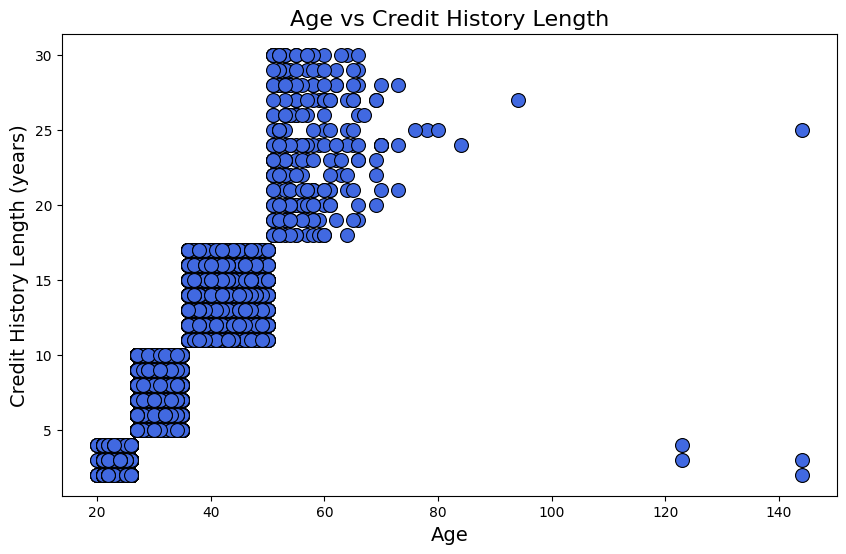

In [ ]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='cred_hist_len', data=df, color='royalblue', edgecolor='black', s=100)
plt.title('Age vs Credit History Length', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Credit History Length (years)', fontsize=14)
plt.show()

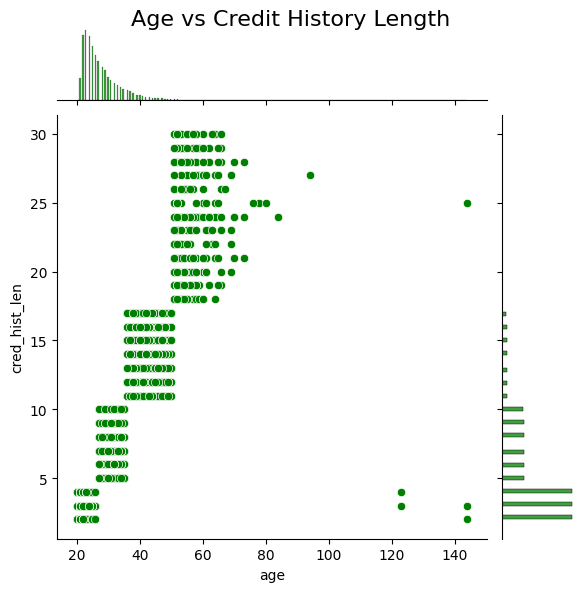

In [ ]:
# Joint Plot
sns.jointplot(x='age', y='cred_hist_len', data=df, kind='scatter', color='green')
plt.suptitle('Age vs Credit History Length', fontsize=16)
plt.subplots_adjust(top=0.95)  # Title'ın düzgün görünmesi için
plt.show()

In [ ]:
df = df[(df['age'] >= 18) & (df['age'] <= 100)]

<ipython-input-59-969ee7aea38e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y='cred_hist_len', data=df, palette="Set2")


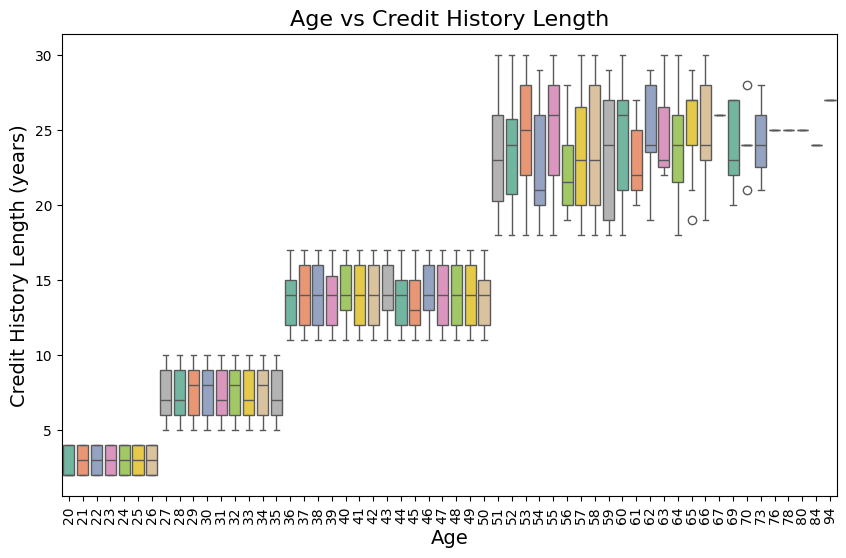

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='cred_hist_len', data=df, palette="Set2")
plt.title('Age vs Credit History Length', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Credit History Length (years)', fontsize=14)
plt.xticks(rotation=90)
plt.show()

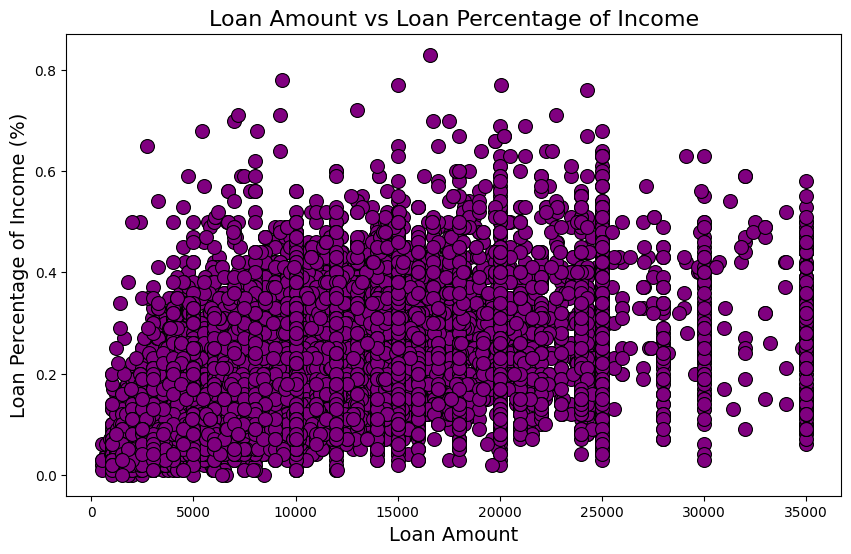

In [ ]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amt', y='loan_pct_income', data=df, color='purple', edgecolor='black', s=100)
plt.title('Loan Amount vs Loan Percentage of Income', fontsize=16)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Loan Percentage of Income (%)', fontsize=14)
plt.show()

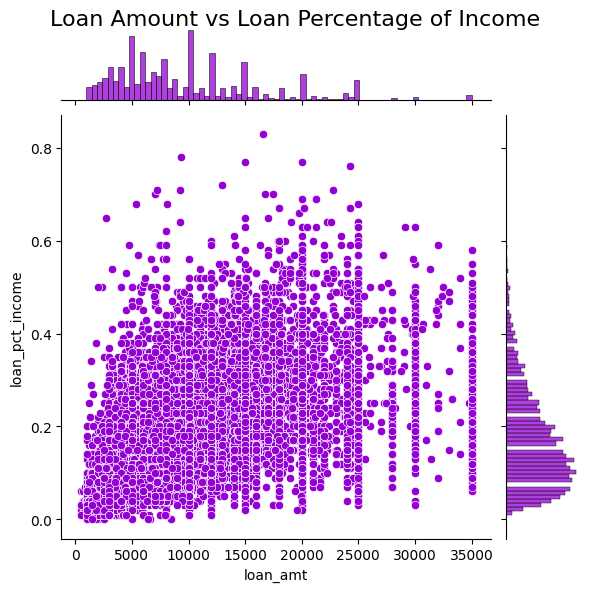

In [ ]:
# Joint Plot
sns.jointplot(x='loan_amt', y='loan_pct_income', data=df, kind='scatter', color='darkviolet')
plt.suptitle('Loan Amount vs Loan Percentage of Income', fontsize=16)
plt.subplots_adjust(top=0.95)  # Title düzgün görünmesi için
plt.show()

**Models**

In [13]:
X = df.drop(columns=['status'])
y = df['status']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

lg = LogisticRegression(class_weight = 'balanced', random_state = 42)
dt = DecisionTreeClassifier(class_weight = 'balanced', random_state=42)
rf = RandomForestClassifier(class_weight = 'balanced', random_state=42)


In [16]:
from sklearn.ensemble import VotingClassifier


voting = VotingClassifier(estimators=[('lr', lg), ('dt', dt), ('rf', rf)], voting='hard')

voting.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42))])

In [17]:
# Predict

y_pred = voting.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))    # Accuracy score is %92.3. This is very good model.
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9233115926783084
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7477
           1       0.87      0.75      0.81      2029

    accuracy                           0.92      9506
   macro avg       0.90      0.86      0.88      9506
weighted avg       0.92      0.92      0.92      9506

